# S5 Processing

**Structural uncertainty due to fault timing: a multi-model case study from the Perth Basin**<br><br>Bardot, K., Lesueur, M., Siade, A. J., Lang, S. C. and McCallum, J. L. (2024)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

### Import results for base case

In [15]:
pickleoff = open('../results/c_results_mean.pkl','rb')
c_mean = pickle.load(pickleoff)
pickleoff.close()

pickleoff = open('../results/h_results_mean.pkl','rb')
h_mean = pickle.load(pickleoff)
pickleoff.close()

pickleoff = open('../results/times.pkl','rb')
times = pickle.load(pickleoff)
pickleoff.close()

pickleoff = open('../results/dd_results_mean.pkl','rb')
drawdown_all = pickle.load(pickleoff)
pickleoff.close()

pickleoff = open('../results/gwf_all.pkl','rb')
gwf_all = pickle.load(pickleoff)
pickleoff.close()

type(times[0])
time_years = []
for t in times: time_years.append(t/365)
    
c_alltime = np.asarray(c_mean)
c_for_obs = np.moveaxis(c_alltime, 1,-1)

h_alltime = np.array(h_mean)
h_for_obs = np.moveaxis(h_alltime, 1,-1)

### Base Case Results

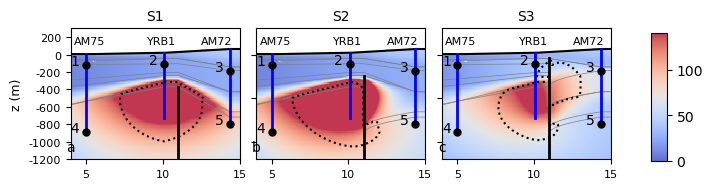

In [16]:
vmin, vmax = 0, 140 
cmap = 'coolwarm'
hstep, kstep = int(ncol/25), int(nlay/25)
levels = [20, 40, 60, 80, 100, 120] # Injection
labels = ['a','b','c']
titles = ['S1', 'S2', 'S3']

fig = plt.figure(figsize=(8,1.7))
for model in range(3):  
    drawdown = drawdown_all[model]
    ax = plt.subplot(1,3,model+1,aspect='auto')
    ax.plot(xc, groundlevel, color = 'black')
    for n in range(nlith): 
        plt.plot(xi,bot_strat_all[model][n], lw = 0.5, c= 'grey')
    xsect = flopy.plot.PlotCrossSection(model=gwf_all[model], line={'Row': 0}, extent = extent)
    csa = xsect.plot_array(drawdown, masked_values=[0], cmap = cmap, alpha=0.8, vmin = vmin, vmax = vmax) 
    ax.plot([AM75.x, AM75.x],[AM75.ground, AM75.jy], color = 'blue', lw = 2.)
    ax.plot([YMB1.x, YMB1.x],[YMB1.ground, YMB1.jy], color = 'blue', lw = 2.)
    ax.plot([AM72.x, AM72.x],[AM72.ground, AM72.jy], color = 'blue', lw = 2.)
    ax.plot([fault_x, fault_x],[zmin, fault_top_all[model]], lw = 2., color='black')
    ax.set_title(titles[model], size = 10)
    ax.set_ylim([-1200, zmax+200])
    ax.set_xlim([4000, 15000])
    if model > 0: ax.set(yticklabels=[])
    if model == 0: ax.set_ylabel('z (m)', size = 10)
    for j in range(5):
        ax.plot(obs_coords[j][0], obs_coords[j][1], 'o', ms = 5, color = 'black')
        ax.annotate(j+1,(obs_coords[j][0]-1000,obs_coords[j][1]), size = 10)

    array = c_mean[model,-1,:,0,:]
    array[array == 1e30] = 0.
    levels = [5] 
    CS = ax.contour(X, Z, array, levels,colors='Black', linewidths=1.5, linestyles = 'dotted')
    if i == 1: ax.set_xlabel('x (km)', size = 10)
    ax.set_xticks([5000, 10000, 15000])
    ax.set_xticklabels(labels = [5, 10, 15], size = 8)
    if model > 0: ax.set(yticklabels=[])
    if model == 0: 
        ax.set_ylabel('z (m)', size = 9)
        ax.set_yticks([-1200,-1000,-800, -600, -400, -200, 0, 200])
        ax.set_yticklabels(labels = [-1200,-1000,-800, -600, -400, -200, 0, 200], size = 8)
    ax.annotate(labels[model], (4000, -1100), size = 10, ha='center')
    ax.annotate("AM75",(4200, AM75.ground+120), size = 8)#, bbox=dict(facecolor = 'white'))
    ax.annotate("YRB1",(9000, AM75.ground+120), size = 8)#, bbox=dict(facecolor = 'white'))
    ax.annotate("AM72",(12500, AM75.ground+120), size = 8)#, bbox=dict(facecolor = 'white'))
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.1, 0.02, 0.75]) # left, bot, width, height
fig.colorbar(csa, cax=cbar_ax)

plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()

fig.savefig('../figures/fig5.tif', dpi=300)

### Head-Time plots

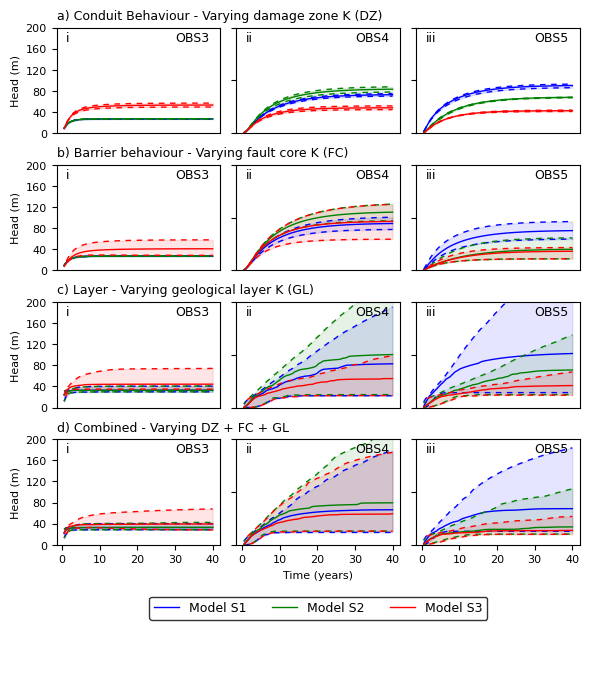

In [17]:
scenarios = ['con', 'bar', 'lay', 'all'] 

labels = ['a) Conduit Behaviour - Varying damage zone K (DZ)',
          'b) Barrier behaviour - Varying fault core K (FC)',
          'c) Layer - Varying geological layer K (GL)',
          'd) Combined - Varying DZ + FC + GL']
 
sublabels = ['i', 'ii', 'iii']
colors_line = ['b','g','r']
alpha = [0.2, 0.6, 1.0]
linestyles = [(0, (4, 4)), (2, (4,4)), (4, (4, 4))]

t = []
for x in range(80): t.append(time_years[x]*9)
t = time_years 
    
fig = plt.figure(figsize=[6.75, 8.5])
    
for i, scenario in enumerate(scenarios):
        
    pickleoff = open('../results/c_results_' + scenario + '.pkl','rb')
    c_load = pickle.load(pickleoff)
    pickleoff.close()
    c_results = c_load #3, 30, 150, 1, 300
    
    pickleoff = open('../results/h_results_' + scenario + '.pkl','rb')
    h_load = pickle.load(pickleoff)
    pickleoff.close()
    h_results = h_load #3, 30, 150, 1, 300

    pickleoff = open('../results/obs_results_' + scenario + '.pkl','rb')
    obs_load = pickle.load(pickleoff)
    pickleoff.close()
    obs_results = np.array(obs_load) # 3, 30, 5, 721    # (313, 100, 5, 80)
    
    for k, obs in enumerate([2,3,4]): 
    
        for model in range(3):

            j = 3 * i + k + 1        
            ax = plt.subplot(5,3,j)#aspect='auto')  

            stacked = np.swapaxes(obs_results, 1, 2)    #obs_results[m][r][i] --> obs_results[m][i][r]   
            p10 = np.nanpercentile(stacked[model][obs], 10, axis=0) 
            p50 = np.nanpercentile(stacked[model][obs], 50, axis=0) 
            p90 = np.nanpercentile(stacked[model][obs], 90, axis=0) 
            ax.plot(t, p10, lw = 1., ls = linestyles[model], color = colors_line[model])
            ax.plot(t, p50, lw = 1.,                         color = colors_line[model])
            ax.plot(t, p90, lw = 1., ls = linestyles[model], color = colors_line[model])
            ax.fill_between(t, p10, p90, color = colors_line[model], alpha = 0.1)
          
            ax.set_ylim([0, 200])

            if j == 11: ax.set_xlabel('Time (years)', size = 8)
            if j <=9: ax.set_xticks([])
            if j > 9: 
                ax.set_xticks([0,10,20,30,40])
                ax.set_xticklabels(labels = [0,10,20,30,40], size = 8)
            if k == 0: 
                ax.set_ylabel('Head (m)', size = 8)
                ax.set_yticks([0, 40, 80, 120, 160, 200])
                ax.set_yticklabels(labels = [0 ,40, 80, 120, 160, 200], size = 8)
            if k > 0: ax.set(yticklabels=[])
            if k == 0: ax.set_title(labels[i], size = 9, loc = 'left' )
        ax.annotate(sublabels[k], (1, 175), size = 9)
        ax.annotate('OBS%i' %(obs+1), (30, 175), size = 9)


ax = plt.subplot(5,1,5)
ax.axis('off')

legend = ['Model S1', 'Model S2', 'Model S3']
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=colors_line[0], lw=1.),
                Line2D([0], [0], color=colors_line[1], lw=1.),
                Line2D([0], [0], color=colors_line[2], lw=1.)]
plt.legend(custom_lines, legend, loc="center", fontsize = 9, ncols = 3, edgecolor = 'black', bbox_to_anchor=[0.5, 0.7])

plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()

fig.savefig('../figures/fig7.tif', dpi=300)

### For Supporting Information (ALL Head-Time plots)

C:\Users\19904604\AppData\Local\Temp\ipykernel_21212\2836148153.py:58: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(5,1,5)


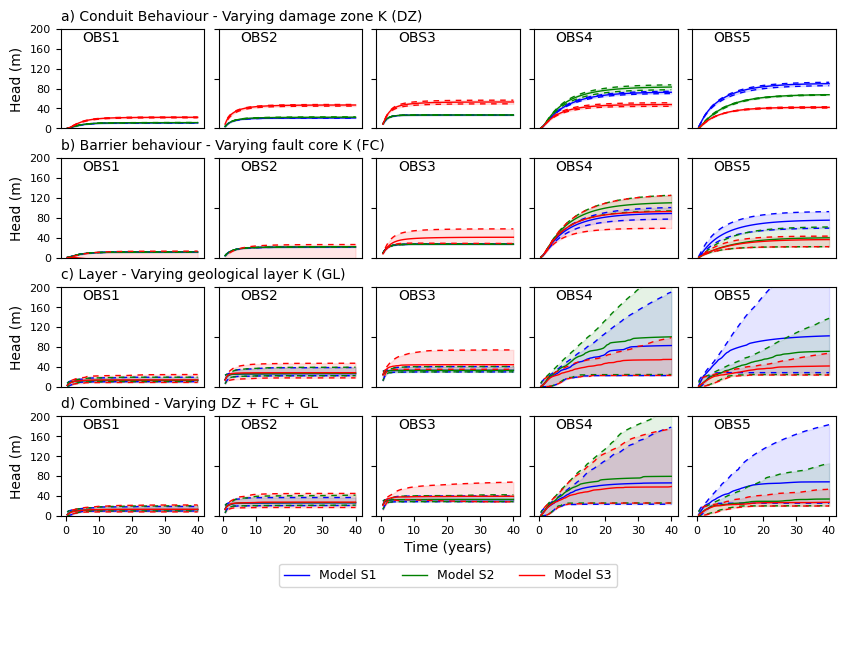

<Figure size 640x480 with 0 Axes>

In [18]:
scenarios = ['con', 'bar', 'lay', 'all'] 

colors_line = ['b','g','r']
alpha = [0.2, 0.6, 1.0]
linestyles = [(0, (4, 4)), (2, (4,4)), (4, (4, 4))]

t = []
for x in range(80): t.append(time_years[x]*9)
t = time_years 
    
fig, ax = plt.subplots(5, 5, figsize=[10, 8])
    
for i, scenario in enumerate(scenarios):

    pickleoff = open('../results/c_results_' + scenario + '.pkl','rb')
    c_load = pickle.load(pickleoff)
    pickleoff.close()
    c_results = c_load #3, 30, 150, 1, 300
    
    pickleoff = open('../results/h_results_' + scenario + '.pkl','rb')
    h_load = pickle.load(pickleoff)
    pickleoff.close()
    h_results = h_load #3, 30, 150, 1, 300

    pickleoff = open('../results/obs_results_' + scenario + '.pkl','rb')
    obs_load = pickle.load(pickleoff)
    pickleoff.close()
    obs_results = np.array(obs_load) # 3, 30, 5, 721    # (313, 100, 5, 80)
    
    for obs in range(5): 
        j = 5 * i + obs + 1   
        ax = plt.subplot(5,5,j)#aspect='auto')  
        ax.set_ylim([0, 200])
        ax.annotate('OBS%i' %(obs+1), (5, 175), size = 10)

        if j == 18: ax.set_xlabel('Time (years)', size = 10)
        if j <= 15: ax.set_xticks([])
        if j > 15: 
            ax.set_xticks([0,10,20,30,40])
            ax.set_xticklabels(labels = [0,10,20,30,40], size = 8)
        if obs == 0: 
            ax.set_ylabel('Head (m)', size = 10)
            ax.set_yticks([0, 40, 80, 120, 160, 200])
            ax.set_yticklabels(labels = [0 ,40, 80, 120, 160, 200], size = 8)
        if obs > 0: ax.set(yticklabels=[])
        if obs == 0: ax.set_title(labels[i], size = 10, loc = 'left' )
    
        for model in range(3):
            stacked = np.swapaxes(obs_results, 1, 2)    #obs_results[m][r][i] --> obs_results[m][i][r]   
            p10 = np.nanpercentile(stacked[model][obs], 10, axis=0) 
            p50 = np.nanpercentile(stacked[model][obs], 50, axis=0) 
            p90 = np.nanpercentile(stacked[model][obs], 90, axis=0) 
            ax.plot(t, p10, lw = 1., ls = linestyles[model], color = colors_line[model])
            ax.plot(t, p50, lw = 1.,                         color = colors_line[model])
            ax.plot(t, p90, lw = 1., ls = linestyles[model], color = colors_line[model])
            ax.fill_between(t, p10, p90, color = colors_line[model], alpha = 0.1)

ax = plt.subplot(5,1,5)
ax.axis('off')
legend = ['Model S1', 'Model S2', 'Model S3']
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=colors_line[0], lw=1.),
                Line2D([0], [0], color=colors_line[1], lw=1.),
                Line2D([0], [0], color=colors_line[2], lw=1.)]
plt.legend(custom_lines, legend, loc="center", fontsize = 9, ncols = 3, bbox_to_anchor=[0.5, 0.7])

plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()
plt.subplots_adjust(wspace=0.2, hspace=0.3)

figname = '../figures/fig7_supporting.tif'
plt.savefig(figname, dpi=300)

### Probability zones - concentration

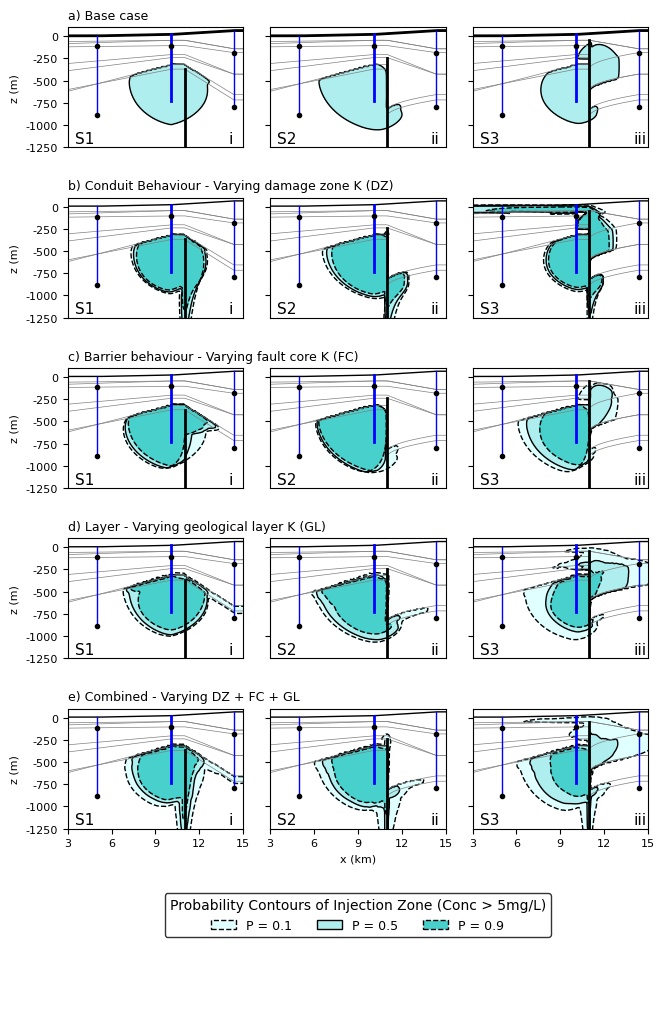

In [19]:
scenarios = ['mean','con', 'bar', 'lay', 'all'] 
labels = ['a) Base case',
          'b) Conduit Behaviour - Varying damage zone K (DZ)',
          'c) Barrier behaviour - Varying fault core K (FC)',
          'd) Layer - Varying geological layer K (GL)',
          'e) Combined - Varying DZ + FC + GL']
sublabels = ['i', 'ii', 'iii']
colors = ['lightcyan', 'paleturquoise','mediumturquoise']#'lightblue', 'lightsteelblue']#'skyblue']#'lightsteelblue']
fig = plt.figure(figsize=[6.75, 10.2])
#fig.suptitle('Probability Contours of Injection Zone (Conc > 5mg/L)', size = 10)
levels = [5,110] # COntour plots for conc = 5 (injection conc = 100)

for i, scenario in enumerate(scenarios):
       
    pickleoff = open('../results/c_results_' + scenario + '.pkl','rb')
    c_load = pickle.load(pickleoff)
    pickleoff.close()
    c_results = c_load #3, 30, 150, 1, 300
    
    for model in range(3):
        j = 3 * i + model + 1
        ax = plt.subplot(6,3,j)#aspect='auto')  
     
        if scenario == 'mean':
            
            array = c_mean[model][-1][:,0,:]
            array[array == 1e30] = 0.
            ax.plot(xc, groundlevel, color = 'black', lw = 2.)
            ax.contourf(X, Z, array, levels, colors = colors[1])
            ax.contour(X, Z, array, levels, colors = 'Black', linewidths=1., linestyles = 'solid')
    
        else:
            
            stacked = np.array(c_results[model]) # stacked = (20, 150, 1, 150)
            median = np.median(stacked, axis = 0) 
            ten_pc = np.percentile(stacked, 10, axis=0)
            ninety_pc = np.percentile(stacked, 90, axis=0)
            P90 = ax.contourf(X, Z, ninety_pc[:,0,:], levels, colors = colors[0])
            P50 = ax.contourf(X, Z, median[:,0,:], levels, colors = colors[1])
            P10 = ax.contourf(X, Z, ten_pc[:,0,:], levels, colors = colors[2])
            
            ax.contour(X, Z, median[:,0,:], levels, colors = 'Black', linewidths=1., linestyles = 'solid')
            ax.contour(X, Z, ten_pc[:,0,:], levels, colors = 'Black', linewidths=1., linestyles = 'dashed')
            ax.contour(X, Z, ninety_pc[:,0,:], levels, colors = 'Black', linewidths=1., linestyles = 'dashed')
        
        ax.plot(xc, groundlevel, color = 'black', lw = 1)
        for n in range(nlith): ax.plot(xi,bot_strat_all[model][n], lw = 0.5, c= 'grey')
        ax.plot([YMB1.x, YMB1.x],[YMB1.ground, YMB1.jy], color = 'blue', lw = 2.)
        ax.plot([fault_x, fault_x],[zmin, fault_top_all[model]], color='black', lw = 2.)
        
        if j == 14: ax.set_xlabel('x (km)', size = 8)
        ax.set_xlim([3000, 15000])
        if j <=12: ax.set_xticks([])
        if j > 12: 
            ax.set_xticks([3000, 6000, 9000, 12000, 15000])
            ax.set_xticklabels(labels = [3, 6, 9, 12, 15], size = 8)
        ax.set_ylim([-1250, 100])
        if model == 0: 
            ax.set_ylabel('z (m)', size = 8)
            ax.set_yticks([-1250, -1000,-750, -500, -250, 0])
            ax.set_yticklabels(labels = [-1250, -1000,-750, -500, -250, 0], size = 8)
        if model > 0: ax.set(yticklabels=[])
        if model == 0: ax.set_title(labels[i], size = 9, loc = 'left' )
        ax.annotate(sublabels[model], (14000, -1200), size = 11)
        ax.annotate('S%i' %(model+1), (3500, -1200), size =11)
        
        ax.plot([AM75.x, AM75.x],[AM75.ground, AM75.jy], color = 'blue', lw = 1.)
        ax.plot([AM72.x, AM72.x],[AM72.ground, AM72.jy], color = 'blue', lw = 1.)
        for ob in range(5):
            ax.plot(obs_coords[ob][0], obs_coords[ob][1], 'o', ms = 3, color = 'black')

ax = plt.subplot(6,1,6)
ax.axis('off')
#legend = ['Model S1', 'Model S2', 'Model S3']
import matplotlib.patches as mpatches
p10_patch = mpatches.Patch(facecolor = colors[0], edgecolor='black', linestyle='dashed', label='P = 0.1')
p50_patch = mpatches.Patch(facecolor = colors[1], edgecolor='black', linestyle='solid', label='P = 0.5')
p90_patch = mpatches.Patch(facecolor = colors[2], edgecolor='black', linestyle='dashed', label='P = 0.9')
ax.legend(handles=[p10_patch, p50_patch, p90_patch], loc="center", fontsize = 9, ncols = 3, edgecolor = 'black',
          bbox_to_anchor=[0.5, 0.7], title = 'Probability Contours of Injection Zone (Conc > 5mg/L)')

plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.tight_layout()

figname = '../figures/fig6.tif'
plt.savefig(figname, dpi=300)

### Probability zones - head

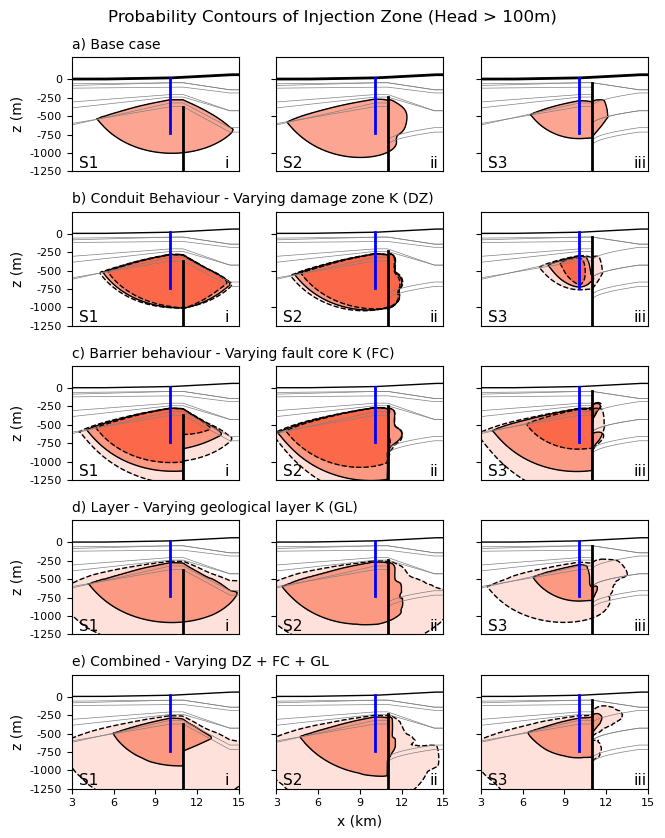

In [20]:
scenarios = ['mean','con', 'bar', 'lay', 'all'] 
labels = ['a) Base case',
          'b) Conduit Behaviour - Varying damage zone K (DZ)',
          'c) Barrier behaviour - Varying fault core K (FC)',
          'd) Layer - Varying geological layer K (GL)',
          'e) Combined - Varying DZ + FC + GL']
sublabels = ['i', 'ii', 'iii']

fig, ax = plt.subplots(5, 3, figsize=[6.75, 8.5])
fig.suptitle('Probability Contours of Injection Zone (Head > 100m)')
levels = [100,9999999] # COntour plots for conc = 5 (injection conc = 100)

for i, scenario in enumerate(scenarios):
       
    pickleoff = open('../results/h_results_' + scenario + '.pkl','rb')
    h_load = pickle.load(pickleoff)
    pickleoff.close()
    h_results = h_load 
    
    for model in range(3):
        j = 3 * i + model + 1
        ax = plt.subplot(5,3,j)
     
        
        if scenario == 'mean':
            
            array = h_mean[model][-1][:,0,:]
            array[array == 1e30] = 0.
            ax.plot(xc, groundlevel, color = 'black', lw = 2.)
            ax.contourf(X, Z, array, levels, cmap = 'Reds', alpha = 0.6)
            ax.contour(X, Z, array, levels, colors = 'Black', linewidths=1., linestyles = 'solid')
    
        else:   
            stacked = np.array(h_results[model]) # stacked = (20, 150, 1, 150)
            median = np.median(stacked, axis = 0) 
            ten_pc = np.percentile(stacked, 10, axis=0)
            ninety_pc = np.percentile(stacked, 90, axis=0)

            CON_10 = ax.contourf(X, Z, ten_pc[:,0,:], levels, cmap = 'Reds', alpha = 1.0)
            CON_MED = ax.contourf(X, Z, median[:,0,:], levels, cmap = 'Reds', alpha = 0.6)
            CON_90 = ax.contourf(X, Z, ninety_pc[:,0,:], levels, cmap = 'Reds', alpha = 0.2)
            
            ax.contour(X, Z, median[:,0,:], levels, colors = 'Black', linewidths=1., linestyles = 'solid')
            ax.contour(X, Z, ten_pc[:,0,:], levels, colors = 'Black', linewidths=1., linestyles = 'dashed')
            ax.contour(X, Z, ninety_pc[:,0,:], levels, colors = 'Black', linewidths=1., linestyles = 'dashed')
        
        ax.plot(xc, groundlevel, color = 'black', lw = 1)
        for n in range(nlith): ax.plot(xi,bot_strat_all[model][n], lw = 0.5, c= 'grey')
        ax.plot([YMB1.x, YMB1.x],[YMB1.ground, YMB1.jy], color = 'blue', lw = 2.)
        ax.plot([fault_x, fault_x],[zmin, fault_top_all[model]], color='black', lw = 2.)
        
        ax.set_xlim([3000, 15000])
        if j == 14: ax.set_xlabel('x (km)', size = 10)
        if j <=12: ax.set_xticks([])
        if j > 12: 
            ax.set_xticks([3000, 6000, 9000, 12000, 15000])
            ax.set_xticklabels(labels = [3, 6, 9, 12, 15], size = 8)
        
        ax.set_ylim([-1250, 300])
        if model == 0: 
            ax.set_ylabel('z (m)', size = 10)
            ax.set_yticks([-1250, -1000,-750, -500, -250, 0])
            ax.set_yticklabels(labels = [-1250, -1000,-750, -500, -250, 0], size = 8)
        if model > 0: ax.set(yticklabels=[])
        if model == 0: ax.set_title(labels[i], size = 10, loc = 'left' )
        ax.annotate(sublabels[model], (14000, -1200), size = 11)
        ax.annotate('S%i' %(model+1), (3500, -1200), size =11)

plt.subplots_adjust(wspace=0.1, hspace=0.4)
plt.tight_layout()

#figname = 'fig6_heads.tif'
#plt.savefig(figname, dpi=300)

### Floating bar plots (not included in paper)

In [21]:
def find_plume_extent(pc, pc_h):
    
    # THIS SECTION FIGURES OUT THE VERTICAL EXTENT OF PLUME (0.05)
    max_bylay = np.max(pc, axis = 2) 
    max_bylay = max_bylay[:,0]
    lay = 0
    while lay < nlay:
        if max_bylay[lay]<max_conc: 
            lay += 1
        else:         
            transport_vertical = zmax - lay*dz + 371 # -371 mAHD is top of injection well 
            break

    # THIS SECTION FIGURES OUT THE HORIZONTAL EXTENT OF PLUME (0.05)
    max_bycol = np.max(pc, axis = 0) 
    max_bycol = max_bycol[0,:]

    col = 0
    while col < ncol:
        if max_bycol[col]<max_conc:
            col += 1
        else:
            left = col
            col += 1
            break
    while col < ncol:
        if max_bycol[col]>max_conc:
            col += 1
        else:
            right = col
            break
    try:
        right
    except NameError:
        right = 20000. 
    leftx = left * dx
    rightx = right * dx        
    transport_horizontal = (right - left)*dx

    # VERTICAL HEAD           
    max_bylay = np.max(pc_h, axis = 2)
    max_bylay = max_bylay[:,0]

    lay = 0
    while lay < nlay:
        if max_bylay[lay]<max_head: # Figure out the extent of head
            lay += 1
        else:         
            head_top = zmax - lay*dz + 371 # -371 mAHD is top of injection well
            break

    # THIS SECTION FIGURES OUT THE HORIZONTAL EXTENT OF HEAD
    max_bycol = np.max(pc_h, axis = 0) 
    max_bycol = max_bycol[0,:]

    col = 0
    while col < ncol:
        if max_bycol[col]<max_head:
            col += 1
        else:
            left = col
            col += 1
            break
    while col < ncol:
        if max_bycol[col]>max_head:
            col += 1
        else:
            right = col
            break

    leftx = left * dx
    rightx = right * dx          
    head_horizontal = (right - left)*dx
    try:
        head_top
    except NameError:
        head_top = 0. 
        
    return(transport_vertical, transport_horizontal, head_top, head_horizontal)


In [22]:
scenarios = ['con', 'bar', 'lay', 'all'] 
zmax, zmin = 100, -2000
nlay, ncol = 150, 300
dz, dx = (zmax-zmin)/nlay, 20000/ncol
probabilities = [10,50,90]
max_conc, max_head = 5, 100 # values of concentrationand head to delineate plume
c_results, h_results = [], []
tops, horizontal = np.ones((len(scenarios),3,len(probabilities))), np.ones((len(scenarios),3,len(probabilities)))
tops_head, horizontal_head = np.ones((len(scenarios),3,len(probabilities))), np.ones((len(scenarios),3,len(probabilities)))

for i, scenario in enumerate(scenarios):    
    pickleoff = open('../results/c_results_' + scenario + '.pkl','rb')
    c_load = pickle.load(pickleoff) # c_load - 3,100,150,1,300 
    pickleoff.close()

    pickleoff = open('../results/h_results_' + scenario + '.pkl','rb')
    h_load = pickle.load(pickleoff) # h_load - 3,100,150,1,300 
    pickleoff.close()
      
    for model in range(3):
        for p in range(len(probabilities)):
            #print(scenario, model, p)
            c = np.array(c_load[model])
            h = np.array(h_load[model])
            pc = np.percentile(c, probabilities[p], axis=0) 
            pc_h = np.percentile(h, probabilities[p], axis=0)
            pc[pc == 1e30] = 0 # mean scenario already has a mask above surface
            pc_h[pc_h == 1e30] = 0 # mean scenario already has a mask above surface

            transport_vertical, transport_horizontal, head_top, head_horizontal = find_plume_extent(pc, pc_h)
            tops[i][model][p] = transport_vertical
            horizontal[i][model][p] = transport_horizontal           
            tops_head[i][model][p] = head_top
            horizontal_head[i][model][p] = head_horizontal

# BASE CASE
for model in range(3):
    pickleoff = open('../results/c_results_mean.pkl','rb')
    temp = pickle.load(pickleoff)
    pickleoff.close()
    base_c = temp[model][-1]
    base_c[base_c == 1e30] = 0.
    pickleoff = open('../results/h_results_mean.pkl','rb')
    temp = pickle.load(pickleoff)
    pickleoff.close()
    base_h = temp[model][-1]
    base_h[base_h == 1e30] = 0.
    
    base_c_vert, base_c_horizontal, base_h_vert, base_h_horizontal = find_plume_extent(base_c, base_h)

### Delineating Plume

In [23]:
scenarios = ['con', 'bar', 'lay', 'all'] 
zmax, zmin = 100, -2000
nlay, ncol = 150, 300
dz, dx = (zmax-zmin)/nlay, 20000/ncol
probabilities = [10,50,90]
max_conc, max_head = 5, 100 # values of concentrationand head to delineate plume
c_results, h_results = [], []
tops, horizontal = np.ones((len(scenarios),3,len(probabilities))), np.ones((len(scenarios),3,len(probabilities)))
tops_head, horizontal_head = np.ones((len(scenarios),3,len(probabilities))), np.ones((len(scenarios),3,len(probabilities)))

for i, scenario in enumerate(scenarios):    
    pickleoff = open('../results/c_results_' + scenario + '.pkl','rb')
    c_load = pickle.load(pickleoff) # c_load - 3,100,150,1,300 
    pickleoff.close()

    pickleoff = open('../results/h_results_' + scenario + '.pkl','rb')
    h_load = pickle.load(pickleoff) # h_load - 3,100,150,1,300 
    pickleoff.close()
      
    for model in range(3):
        pickleoff = open('../results/c_results_mean.pkl','rb')
        base_case_c = pickle.load(pickleoff)
        pickleoff.close()

        base = base_case_c[model][-1][:,0,:]
        base[base == 1e30] = 0.

        for p in range(len(probabilities)):
            #print(scenario, model, p)
            c = np.array(c_load[model])
            h = np.array(h_load[model])
            pc = np.percentile(c, probabilities[p], axis=0) 
            pc_h = np.percentile(h, probabilities[p], axis=0)
            pc[pc == 1e30] = 0 # mean scenario already has a mask above surface
            pc_h[pc_h == 1e30] = 0 # mean scenario already has a mask above surface

            # THIS SECTION FIGURES OUT THE VERTICAL EXTENT OF PLUME (0.05)
            max_bylay = np.max(pc, axis = 2) 
            max_bylay = max_bylay[:,0]

            lay = 0
            while lay < nlay:
                if max_bylay[lay]<max_conc: 
                    lay += 1
                else:         
                    top = zmax - lay*dz + 371 # -371 mAHD is top of injection well 
                    tops[i][model][p] = top
                    break

            # THIS SECTION FIGURES OUT THE HORIZONTAL EXTENT OF PLUME (0.05)
            max_bycol = np.max(pc, axis = 0) 
            max_bycol = max_bycol[0,:]

            col = 0
            while col < ncol:
                if max_bycol[col]<max_conc:
                    col += 1
                else:
                    left = col
                    col += 1
                    break
            while col < ncol:
                if max_bycol[col]>max_conc:
                    col += 1
                else:
                    right = col
                    break

            leftx = left * dx
            rightx = right * dx
            horizontal[i][model][p] = (right - left)*dx
            
            # VERTICAL HEAD
            
            max_bylay = np.max(pc_h, axis = 2)
            max_bylay = max_bylay[:,0]

            lay = 0
            while lay < nlay:
                if max_bylay[lay]<max_head: # Figure out the extent of head
                    lay += 1
                else:         
                    head_top = zmax - lay*dz + 371 # -371 mAHD is top of injection well
                    #print('Model ', model, 'Scenario ', scenario, 'prob ', p, 'head top = ', head_top)
                    #print('head_top = ', head_top)
                    tops_head[i][model][p] = head_top
                    break

            # THIS SECTION FIGURES OUT THE HORIZONTAL EXTENT OF HEAD
            max_bycol = np.max(pc_h, axis = 0) 
            max_bycol = max_bycol[0,:]

            col = 0
            while col < ncol:
                if max_bycol[col]<max_head:
                    col += 1
                else:
                    left = col
                    col += 1
                    break
            while col < ncol:
                if max_bycol[col]>max_head:
                    col += 1
                else:
                    right = col
                    break

            leftx = left * dx
            rightx = right * dx
            horizontal_head[i][model][p] = (right - left)*dx

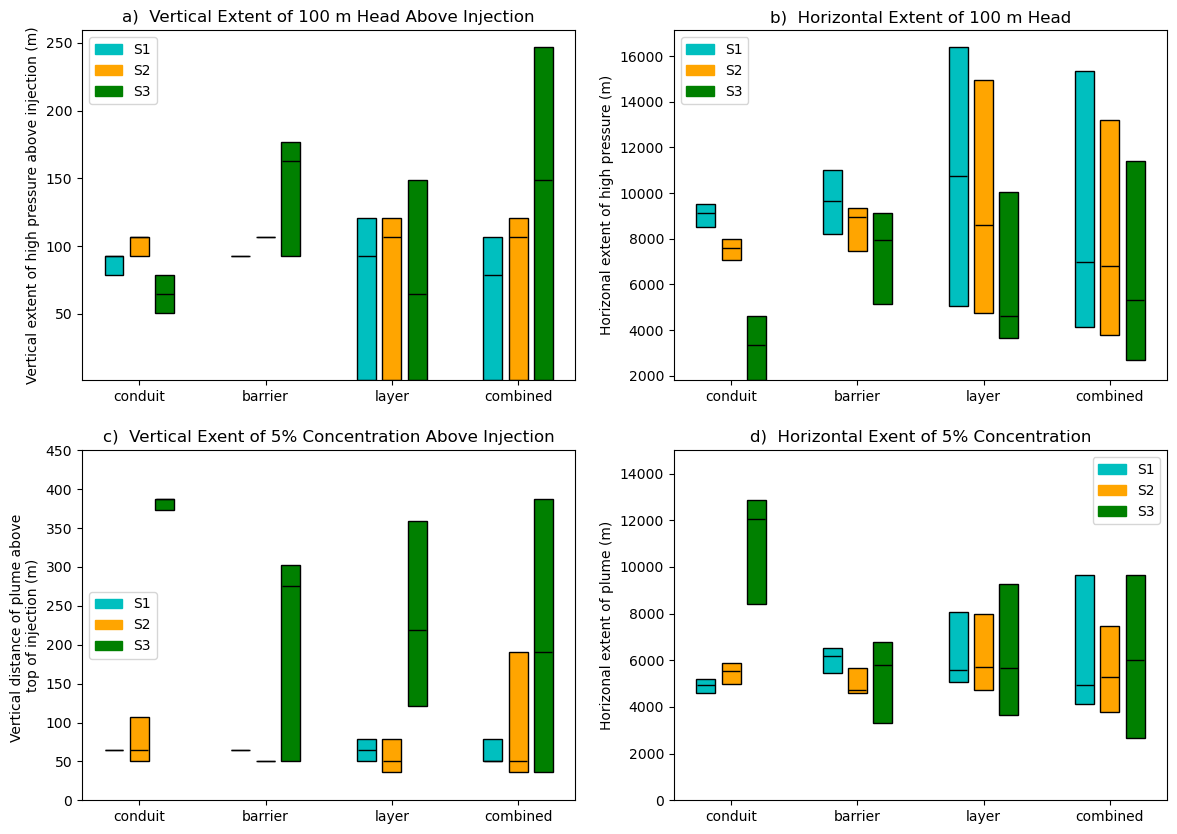

In [24]:
x = np.arange(len(scenarios)) + 1
width = 0.15
scenario_names = ['conduit', 'barrier', 'layer', 'combined'] 
# tops and horizontal are in order[scenario][model][percentile]

fig = plt.figure(figsize=(14,10))
# Legend
import matplotlib.patches as mpatches
s1_patch = mpatches.Patch(color='c', label='S1')
s2_patch = mpatches.Patch(color='orange', label='S2')
s3_patch = mpatches.Patch(color='green', label='S3')
# ------------------------------------------------------------------------------


#-------------------------------------------------------------------------------
ax = plt.subplot(2,2,1,aspect='auto')  # Plot vertical extent

# bar height = 90th percentile - 10th percetile
# x position, heigt of bar, width or bar, bottom of bar

ax.plot(x-0.2, tops_head[:,0,1], '_', ms = 13, color='black') # Line in middle - 50 percentile
ax.plot(x+0.0, tops_head[:,1,1], '_', ms = 13, color='black') 
ax.plot(x+0.2, tops_head[:,2,1], '_', ms = 13, color='black') 

ax.bar(x-0.2, tops_head[:,0,2] - tops_head[:,0,0], width, tops_head[:,0,0], color='c', edgecolor='black') # S1
ax.bar(x+0.0, tops_head[:,1,2] - tops_head[:,1,0], width, tops_head[:,1,0], color='orange', edgecolor='black') # S2
ax.bar(x+0.2, tops_head[:,2,2] - tops_head[:,2,0], width, tops_head[:,2,0], color='green', edgecolor='black') # S3

#plt.ylim([0,450])
plt.xticks(x, scenario_names)
plt.ylabel("Vertical extent of high pressure above injection (m)")
ax.set_title('a)  Vertical Extent of 100 m Head Above Injection', size = 12)
plt.legend(handles=[s1_patch, s2_patch, s3_patch])

ax = plt.subplot(2,2,2,aspect='auto')  # Plot horizontal plume extent
 
ax.plot(x-0.2, horizontal_head[:,0,1], '_', ms = 13, color='black') # Line in middle - 50 percentile
ax.plot(x+0.0, horizontal_head[:,1,1], '_', ms = 13, color='black') 
ax.plot(x+0.2, horizontal_head[:,2,1], '_', ms = 13, color='black') 

ax.bar(x-0.2, horizontal_head[:,0,2] - horizontal_head[:,0,0], width, horizontal_head[:,0,0], color='c', edgecolor='black') # S1 
ax.bar(x+0.0, horizontal_head[:,1,2] - horizontal_head[:,1,0], width, horizontal_head[:,1,0], color='orange', edgecolor='black') # S2
ax.bar(x+0.2, horizontal_head[:,2,2] - horizontal_head[:,2,0], width, horizontal_head[:,2,0], color='green', edgecolor='black') # S3

#plt.ylim([0,15000])
plt.xticks(x, scenario_names)
#plt.xlabel("Scenarios")
plt.ylabel("Horizonal extent of high pressure (m)")
ax.set_title('b)  Horizontal Extent of 100 m Head', size = 12)
plt.legend(handles=[s1_patch, s2_patch, s3_patch])

#--------------------------------------------------------------------------------------

ax = plt.subplot(2,2,3,aspect='auto')  # Plot vertical extent

# bar height = 90th percentile - 10th percetile
# x position, heigt of bar, width or bar, bottom of bar

ax.plot(x-0.2, tops[:,0,1], '_', ms = 13, color='black') # Line in middle - 50 percentile
ax.plot(x+0.0, tops[:,1,1], '_', ms = 13, color='black') 
ax.plot(x+0.2, tops[:,2,1], '_', ms = 13, color='black') 

ax.bar(x-0.2, tops[:,0,2] - tops[:,0,0], width, tops[:,0,0], color='c', edgecolor='black') # S1
ax.bar(x+0.0, tops[:,1,2] - tops[:,1,0], width, tops[:,1,0], color='orange', edgecolor='black') # S2
ax.bar(x+0.2, tops[:,2,2] - tops[:,2,0], width, tops[:,2,0], color='green', edgecolor='black') # S3

plt.ylim([0,450])
plt.xticks(x, scenario_names)
plt.ylabel("Vertical distance of plume above \ntop of injection (m)")
ax.set_title('c)  Vertical Exent of 5% Concentration Above Injection', size = 12)
plt.legend(handles=[s1_patch, s2_patch, s3_patch])

ax = plt.subplot(2,2,4,aspect='auto')  # Plot horizontal plume extent
 
ax.plot(x-0.2, horizontal[:,0,1], '_', ms = 13, color='black') # Line in middle - 50 percentile
ax.plot(x+0.0, horizontal[:,1,1], '_', ms = 13, color='black') 
ax.plot(x+0.2, horizontal[:,2,1], '_', ms = 13, color='black') 

ax.bar(x-0.2, horizontal[:,0,2] - horizontal[:,0,0], width, horizontal[:,0,0], color='c', edgecolor='black') # S1 
ax.bar(x+0.0, horizontal[:,1,2] - horizontal[:,1,0], width, horizontal[:,1,0], color='orange', edgecolor='black') # S2
ax.bar(x+0.2, horizontal[:,2,2] - horizontal[:,2,0], width, horizontal[:,2,0], color='green', edgecolor='black') # S3

plt.ylim([0,15000])
plt.xticks(x, scenario_names)
#plt.xlabel("Scenarios")
plt.ylabel("Horizonal extent of plume (m)")
ax.set_title('d)  Horizontal Exent of 5% Concentration', size = 12)
plt.legend(handles=[s1_patch, s2_patch, s3_patch])


### S3 only

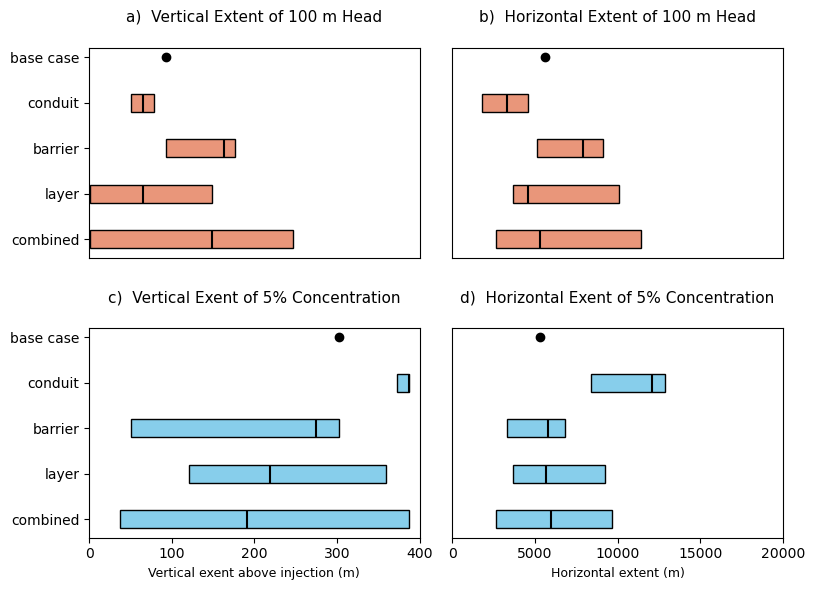

In [25]:
y = np.arange(len(scenarios)) + 1
y = y[::-1]
height = 0.4
scenario_names = ['base case', 'conduit', 'barrier', 'layer', 'combined'] 
# tops and horizontal are in order[scenario][model][percentile]

fig = plt.figure(figsize=(8.25,6))
import matplotlib.patches as mpatches

#-------------------------------------------------------------------------------
ax = plt.subplot(2,2,1,aspect='auto')  # Plot vertical extent
ax.vlines(tops_head[:,2,1], y-height/2, y+height/2, color = 'black')
ax.barh(y=y, width=tops_head[:,2,2] - tops_head[:,2,0], left=tops_head[:,2,0], height=height, color='darksalmon', edgecolor='black')
ax.set_title('a)  Vertical Extent of 100 m Head\n', size = 11)
#ax.xaxis.set_label_position('top')
ax.plot(base_h_vert, 5, 'o', color = 'black')
ax.set_xlim([0,400])
plt.xticks([])
plt.yticks([5,4,3,2,1], scenario_names)

ax = plt.subplot(2,2,2,aspect='auto')  # Plot horizontal plume extent
ax.vlines(horizontal_head[:,2,1], y-height/2, y+height/2, color = 'black')
ax.barh(y=y, width=horizontal_head[:,2,2] - horizontal_head[:,2,0], left=horizontal_head[:,2,0], height=height, color='darksalmon', edgecolor='black')
ax.set_title('b)  Horizontal Extent of 100 m Head\n', size = 11)
ax.plot(base_h_horizontal, 5, 'o', color = 'black')
ax.set_xlim([0,20000])
plt.xticks([])
plt.yticks([])

#--------------------------------------------------------------------------------------

ax = plt.subplot(2,2,3,aspect='auto')  # Plot vertical extent
ax.vlines(tops[:,2,1], y-height/2, y+height/2, color = 'black')
ax.barh(y=y, width = tops[:,2,2] - tops[:,2,0], left = tops[:,2,0], height = height, color='skyblue', edgecolor='black') # S3
ax.set_title('\nc)  Vertical Exent of 5% Concentration\n', size = 11)
ax.set_xlabel('Vertical exent above injection (m)', size = 9)
ax.plot(base_c_vert, 5, 'o', color = 'black')
plt.yticks([5,4,3,2,1], scenario_names)
ax.set_xlim([0,400])

ax = plt.subplot(2,2,4,aspect='auto')  # Plot horizontal plume extent
ax.vlines(horizontal[:,2,1], y-height/2, y+height/2, color = 'black')
ax.barh(y=y, width = horizontal[:,2,2] - horizontal[:,2,0], left = horizontal[:,2,0], height = height, color='skyblue', edgecolor='black') # S3
ax.set_title('\nd)  Horizontal Exent of 5% Concentration\n', size = 11)
ax.set_xlabel('Horizontal extent (m)', size = 9)
ax.plot(base_c_horizontal, 5, 'o', color = 'black')
plt.yticks([])
ax.set_xlim([0,20000])
